In [1]:
import pandas as pd
import numpy as np
import awkward as ak
import h5py

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import RegularPolygon
from matplotlib.colors import to_rgb, to_rgba

import plotly as ply
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [2]:
def set_custom_alpha(col_, alpha_):
    rgb_ = to_rgba(col_)
    return (col_[0], col_[1], col_[2], alpha_)

def rgb2rgba(col_):
    _ = []
    for c in col_:
        _.append(float(c)/255.0)
    _.append(1.0)
    return tuple(_)

def getNcols(N=3, cmap_='plasma'):
    cmap = plt.get_cmap(cmap_)
    cols = cmap.colors
    arr = []
    for i in range(N):
        arr.append(cols[int(256*float(i)/float(N))])
    return arr

In [3]:
%matplotlib inline
pio.renderers.default='notebook'

In [33]:
# fullsim hdf5 files
hdf.keys()
path_to_input_file = '/home/rusack/shared/hdf5/hgcal_pion/fullsim_hgcal_pion_data_9.h5'
hdf = h5py.File(path_to_input_file)
nhits = np.array(hdf['nhits'], dtype='int')
z = np.array(hdf['hit_z'])
x = np.array(hdf['hit_x'])
y = np.array(hdf['hit_y'])
energy = np.array(hdf['hit_en'])
layer_pos = np.unique(z)

In [ ]:
path_to_input_file = '/home/rusack/shared/hdf5/hgcal_pion/hgcal_pions_combinedHgc_Ahc_2.h5'
hdf = h5py.File(path_to_input_file)
nhits = np.array(hdf['nhits'], dtype='int')
z = np.array(hdf['rechit_z'])
x = np.array(hdf['rechit_x'])
y = np.array(hdf['rechit_y'])
energy = np.array(hdf['rechit_energy'])
layer_pos = np.unique(z)

In [36]:
x = ak.unflatten(x, nhits)
y = ak.unflatten(y, nhits)
z = ak.unflatten(z, nhits)
energy = ak.unflatten(energy, nhits)

In [40]:
x = ak.flatten(x)
y = ak.flatten(y)
z = ak.flatten(z)
energy = ak.flatten(energy)

In [ ]:
ievent = 3

rechits_x = np.array(x[ievent])
rechits_y = np.array(y[ievent])
rechits_z = np.array(z[ievent])
rechits_energy = np.array(energy[ievent])

rechits_x = rechits_x[rechits_energy>0.5]
rechits_y = rechits_y[rechits_energy>0.5]
rechits_z = rechits_z[rechits_energy>0.5]
rechits_energy = rechits_energy[rechits_energy>0.5]

In [9]:
radius = 0.5626

In [10]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

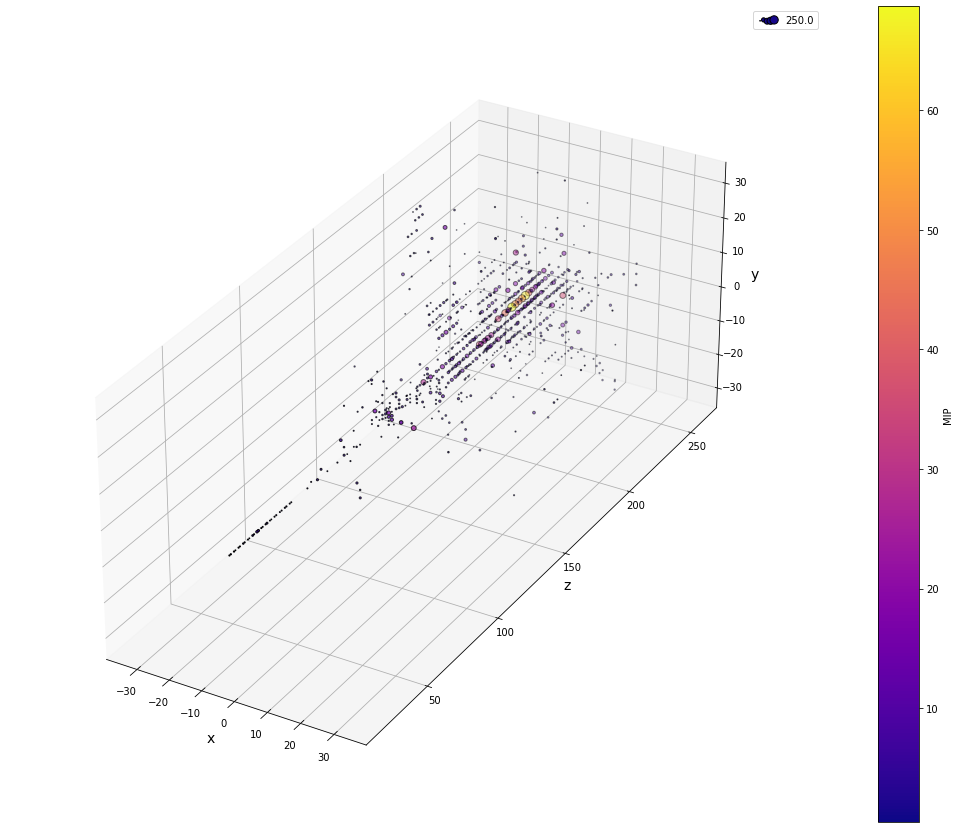

In [9]:
fig = plt.figure(figsize=(20,15));

norm = matplotlib.colors.Normalize(vmin=min(rechits_energy), vmax=max(rechits_energy))
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.plasma)

cc = [mapper.to_rgba(e) for e in rechits_energy]
ax = fig.add_subplot(111, projection='3d');
ax.set_box_aspect([1.0, 2.5, 1.0])
ax.scatter(rechits_x, rechits_z, rechits_y,
           s=rechits_energy,
           c=cc, depthshade=True, linewidth=1, edgecolor='black');

mapper.set_array(cc)
plt.colorbar(mapper, label='MIP' )
ax.set_ylim3d([min(rechits_x), max(rechits_x)])
ax.set_ylim3d([layer_pos[0], layer_pos[-1]])
ax.set_zlim3d([min(rechits_y), max(rechits_y)])
y = lambda x: (np.tanh(-x*50.)+1.)*250
x = np.arange(0,.05,.01)

sizes = y(x)
labels = x

# I can't figure out what to do here:
l = ax.legend(sizes, scatterpoints = len(sizes))
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('z', fontsize=14)
ax.set_zlabel('y', fontsize=14)
plt.savefig('event_display_pi.png')

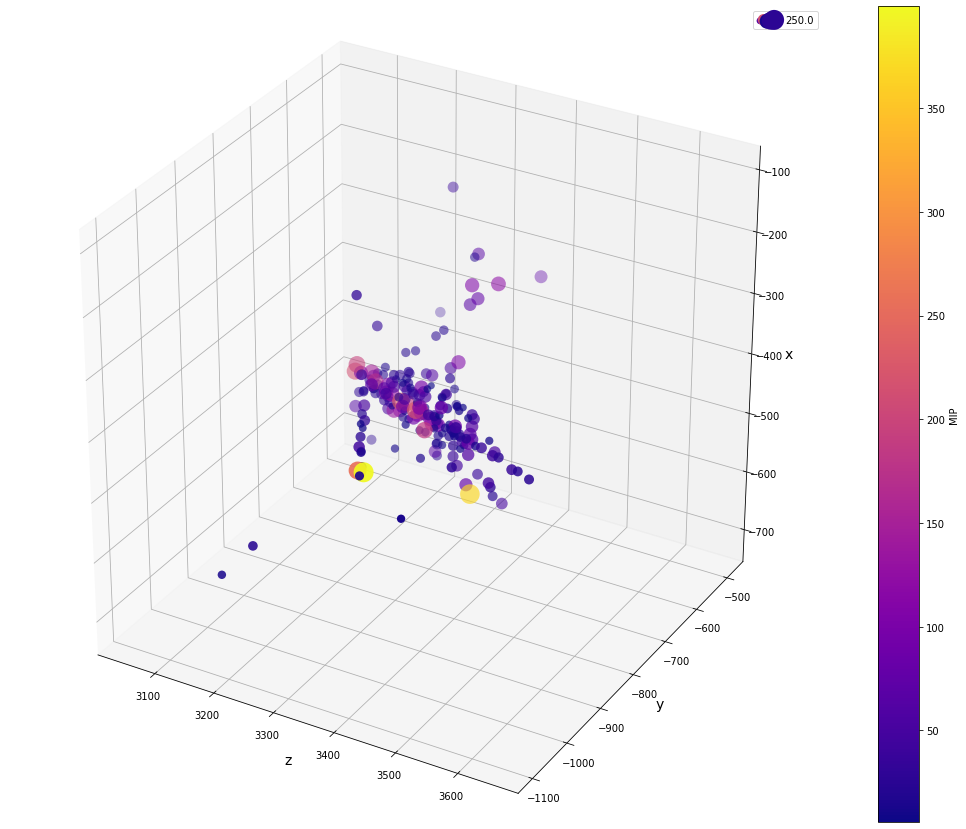

In [32]:
fig = plt.figure(figsize=(20,15));

norm = matplotlib.colors.Normalize(vmin=min(rechits_energy), vmax=max(rechits_energy))
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.plasma)

cc = [mapper.to_rgba(e) for e in rechits_energy]
ax = fig.add_subplot(111, projection='3d');
ax.set_box_aspect([1.0, 1.0, 1.0])
ax.scatter(rechits_z, rechits_y, rechits_x,
           s=20*np.sqrt(rechits_energy),
           c=cc, depthshade=True, linewidth=0, edgecolor='gray');

mapper.set_array(cc)
#set_axes_equal(ax)
plt.colorbar(mapper, label='MIP' )

xmean = np.mean(rechits_x)
ymean = np.mean(rechits_y)
zmean = np.mean(rechits_z)

xstd = np.std(rechits_x)
ystd = np.std(rechits_y)
zstd = np.std(rechits_z)

ax.set_zlim3d([xmean-3*xstd, xmean+3*xstd])
ax.set_ylim3d([ymean-3*xstd, ymean+3*xstd])
ax.set_xlim3d([zmean-3*xstd, zmean+3*xstd])
f = lambda x: (np.tanh(-x*50.)+1.)*250
sarr = np.arange(0,.05,.01)

sizes = f(sarr)
labels = sarr

# I can't figure out what to do here:
l = ax.legend(sizes, scatterpoints = len(sizes))
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('x', fontsize=14)
plt.savefig('event_display_pi.png')

In [43]:
rechits_x = np.array(x[:100000])
rechits_y = np.array(y[:100000])
rechits_z = np.array(z[:100000])
rechits_energy = np.array(energy[:100000])

rechits_x = rechits_x[rechits_energy>0.5]
rechits_y = rechits_y[rechits_energy>0.5]
rechits_z = rechits_z[rechits_energy>0.5]
rechits_energy = rechits_energy[rechits_energy>0.5]

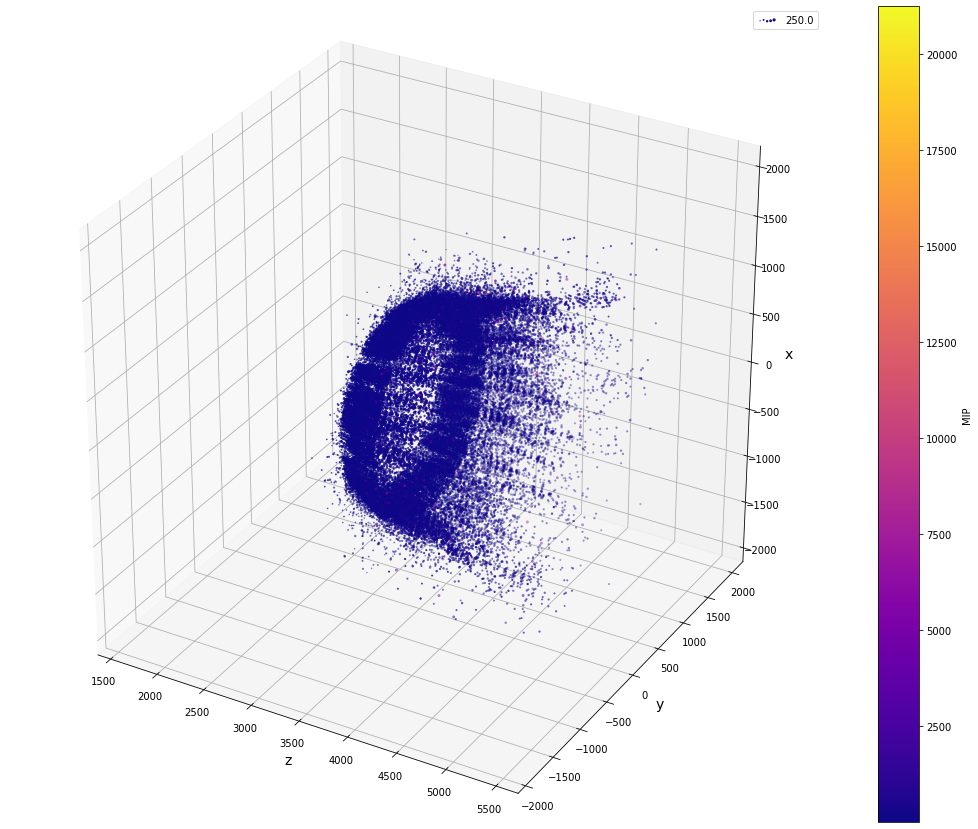

In [45]:
fig = plt.figure(figsize=(20,15));

norm = matplotlib.colors.Normalize(vmin=min(rechits_energy), vmax=max(rechits_energy))
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.plasma)

cc = [mapper.to_rgba(e) for e in rechits_energy]
ax = fig.add_subplot(111, projection='3d');
ax.set_box_aspect([1.0, 1.0, 1.0])
ax.scatter(rechits_z, rechits_y, rechits_x,
           s=np.log(rechits_energy),
           c=cc, depthshade=True, linewidth=0, edgecolor='gray');

mapper.set_array(cc)
#set_axes_equal(ax)
plt.colorbar(mapper, label='MIP' )

xmean = np.mean(rechits_x)
ymean = np.mean(rechits_y)
zmean = np.mean(rechits_z)

xstd = np.std(rechits_x)
ystd = np.std(rechits_y)
zstd = np.std(rechits_z)

ax.set_zlim3d([xmean-3*xstd, xmean+3*xstd])
ax.set_ylim3d([ymean-3*xstd, ymean+3*xstd])
ax.set_xlim3d([zmean-3*xstd, zmean+3*xstd])
f = lambda x: (np.tanh(-x*50.)+1.)*250
sarr = np.arange(0,.05,.01)

sizes = f(sarr)
labels = sarr

# I can't figure out what to do here:
l = ax.legend(sizes, scatterpoints = len(sizes))
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('x', fontsize=14)
plt.savefig('event_display_pi.png')

In [47]:
true_energy = np.array(hdf['genEn'])

In [56]:
events = np.array(hdf['Event'])

In [62]:
true_energy

array([14.13883018, 14.13889694, 14.13885403, ..., 15.13872051,
       15.1377573 , 15.13887882])

In [64]:
np.unique(true_energy)[0:10]

array([14.13128376, 14.13239765, 14.1339016 , 14.13430023, 14.13441849,
       14.13469124, 14.13475323, 14.13496971, 14.13584614, 14.13604641])

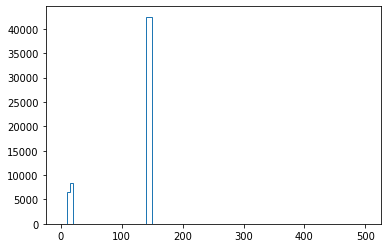

In [51]:
plt.clf()
plt.hist(true_energy, bins=100, range=(0, 500), histtype='step')
plt.show()